# COM6509 Assignment 1 
We will build a predictive model that uses vehicle characteristics to accurately predict insurance claim payments

First, we get the data and analyze the attributes. We have to look out for columns with missing or NA values which needs to be handled before proceeding with developing the model.

In [1]:
import pandas as pd
import numpy as np
from numpy import nan


insurance_data = pd.read_csv('./data/train.csv')
insurance_data.describe()

,Row_ID,Household_ID,Vehicle,Calendar_Year,Model_Year,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,NVVar1,NVVar2,NVVar3,NVVar4,Claim_Amount
count,3.000000e+04,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,5.265666e+06,3.415164e+06,1.869133,2006.118667,1999.505933,-0.006781,-0.063997,-0.025057,-0.053640,0.012070,-0.044910,-0.024929,-0.064832,0.032385,0.071626,0.078748,0.041319,54.862481
std,3.034083e+06,1.942246e+06,1.150848,0.804947,5.048889,0.976902,0.960495,1.016570,0.959304,0.986830,0.971651,1.000754,0.979235,1.063700,1.148950,1.144502,1.073275,244.230985
min,1.160000e+03,6.830000e+02,1.000000,2005.000000,1981.000000,-2.578222,-2.441519,-2.744055,-2.457475,-3.350344,-2.300626,-2.262411,-1.882994,-0.231530,-0.266117,-0.272337,-0.251419,0.000000
25%,2.670346e+06,1.917093e+06,1.000000,2005.000000,1997.000000,-0.665897,-0.816152,-0.869687,-0.783019,-0.662235,-0.688765,-0.898486,-0.646298,-0.231530,-0.266117,-0.272337,-0.251419,0.000000
50%,5.255290e+06,3.654160e+06,2.000000,2006.000000,2000.000000,-0.320393,-0.124506,-0.221758,-0.106471,-0.115098,-0.241936,-0.468419,-0.269656,-0.231530,-0.266117,-0.272337,-0.251419,0.000000
75%,7.858568e+06,4.992703e+06,2.000000,2007.000000,2003.000000,0.442930,0.480684,0.726996,0.485509,0.550982,0.500830,0.870931,0.327962,-0.231530,-0.266117,-0.272337,-0.251419,5.905321
max,1.051789e+07,6.484624e+06,17.000000,2007.000000,2008.000000,4.540768,6.307799,5.563325,6.100857,3.869488,4.584289,4.127148,33.457737,6.627110,8.883081,8.691144,6.388802,11440.750000


In [2]:
insurance_data.head()

,Row_ID,Household_ID,Vehicle,Calendar_Year,Model_Year,Blind_Make,Blind_Model,Blind_Submodel,Cat1,Cat2,...,Var5,Var6,Var7,Var8,NVCat,NVVar1,NVVar2,NVVar3,NVVar4,Claim_Amount
0,2718481,1933325,3,2006,1997,R,R.20,R.20.6,B,?,...,-1.054747,-1.164837,-0.812472,-0.581756,N,-0.23153,-0.266117,2.715490,-0.251419,104.597500
1,6717427,4297298,1,2006,1997,BF,BF.35,BF.35.1,F,?,...,-1.149901,-1.299354,-1.193388,-1.323992,N,-0.23153,2.783616,-0.272337,-0.251419,0.000000
2,7218252,4708245,1,2006,2000,M,M.16,M.16.1,B,C,...,-0.775231,-1.467792,-0.947636,-0.914860,F,-0.23153,-0.266117,-0.272337,-0.251419,0.000000
3,8048505,5136981,7,2007,2003,BH,BH.22,BH.22.0,B,C,...,-0.751442,-0.378792,-0.689596,0.730640,M,-0.23153,-0.266117,-0.272337,-0.251419,0.000000
4,3209482,2151306,5,2006,2001,BW,BW.167,BW.167.0,I,C,...,0.461775,1.451805,1.411586,0.977104,B,-0.23153,-0.266117,-0.272337,-0.251419,0.615937


In [5]:
numeric: ['Vehicle', 'Calendar_Year','Model_Year',
'Blind_Make',  'Blind_Model', 'Blind_Submodel',\
                  'Cat9','Cat12','OrdCat','NVCat']

In [6]:
insurance_data = insurance_data.iloc[:,2:35]

In [7]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 33 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Vehicle         30000 non-null  int64  
 1   Calendar_Year   30000 non-null  int64  
 2   Model_Year      30000 non-null  int64  
 3   Blind_Make      30000 non-null  object 
 4   Blind_Model     30000 non-null  object 
 5   Blind_Submodel  30000 non-null  object 
 6   Cat1            30000 non-null  object 
 7   Cat2            30000 non-null  object 
 8   Cat3            30000 non-null  object 
 9   Cat4            30000 non-null  object 
 10  Cat5            30000 non-null  object 
 11  Cat6            30000 non-null  object 
 12  Cat7            30000 non-null  object 
 13  Cat8            30000 non-null  object 
 14  Cat9            30000 non-null  object 
 15  Cat10           30000 non-null  object 
 16  Cat11           30000 non-null  object 
 17  Cat12           29948 non-null 

In [8]:
for col in ['Vehicle', 'Calendar_Year', 'Model_Year']:
    insurance_data[col] = insurance_data[col].astype('float64')


In the above steps we have done the below:
 - Identified that the columns 'Row_ID' and 'Household_ID' are just data identifiers and do not contribute to the prediction and thus have been dropped
 - Typecasted columns from int64 to float64

Next we'll try to visualize the data and try to find any variables that influence the predictor variable. A histogram plots for the columns will give us the distribution of the numerical data. A correlation matrix will give us any dependancy between the variables and the predictor variables which we'll also be able to confirm using scatter plots of these variables

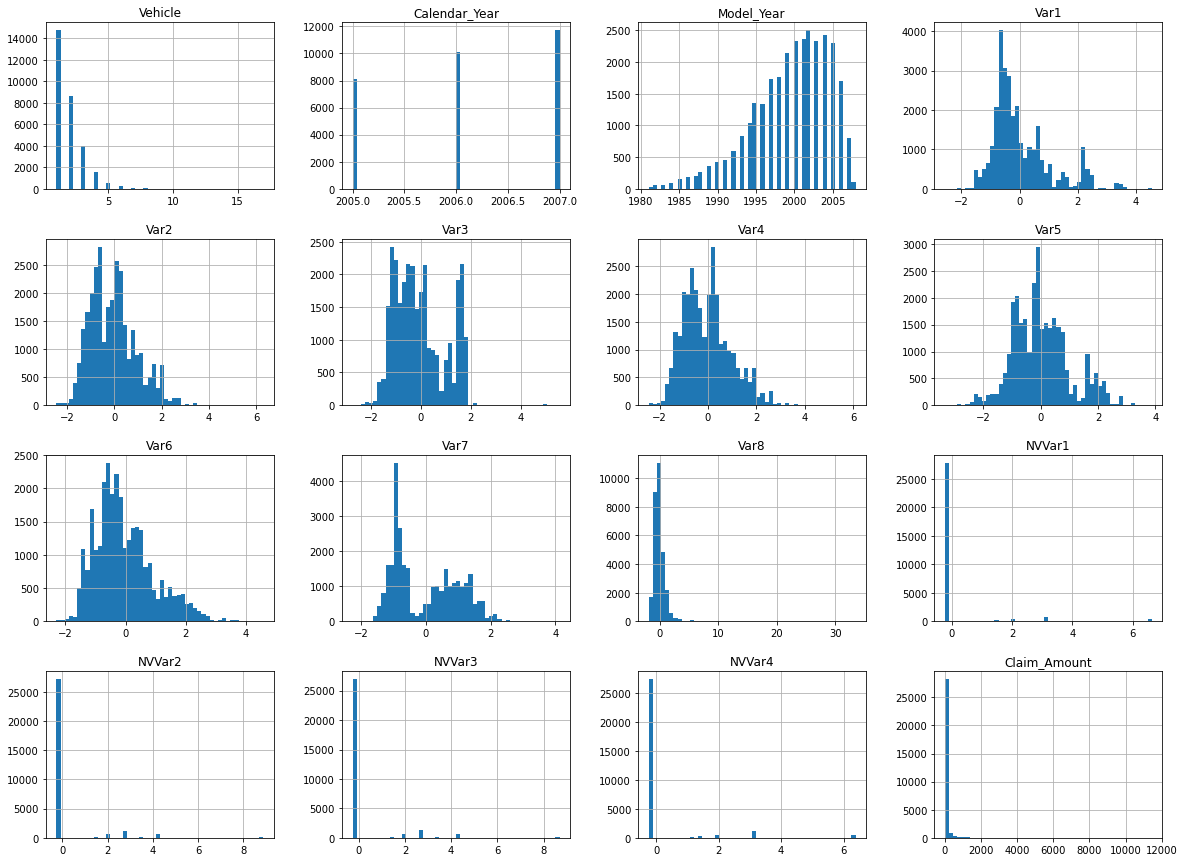

In [116]:
%matplotlib inline 
import matplotlib.pyplot as plt
insurance_data.hist(bins=50, figsize=(20,15))
plt.show()

The distribution of these variables as seen can be said to have some skewness. They also seem to have many outliers.

In [117]:
corr_matrix = insurance_data.corr()
corr_matrix['Claim_Amount'].sort_values(ascending=False)

Claim_Amount     1.000000
Vehicle          0.012099
Var1             0.009963
Var5             0.009348
NVVar2           0.004610
Var7             0.003796
Var3             0.002661
Var4             0.000812
Var6             0.000329
Var2            -0.000599
Model_Year      -0.000879
NVVar3          -0.001729
NVVar4          -0.002745
NVVar1          -0.006349
Var8            -0.007477
Calendar_Year   -0.021446
Name: Claim_Amount, dtype: float64

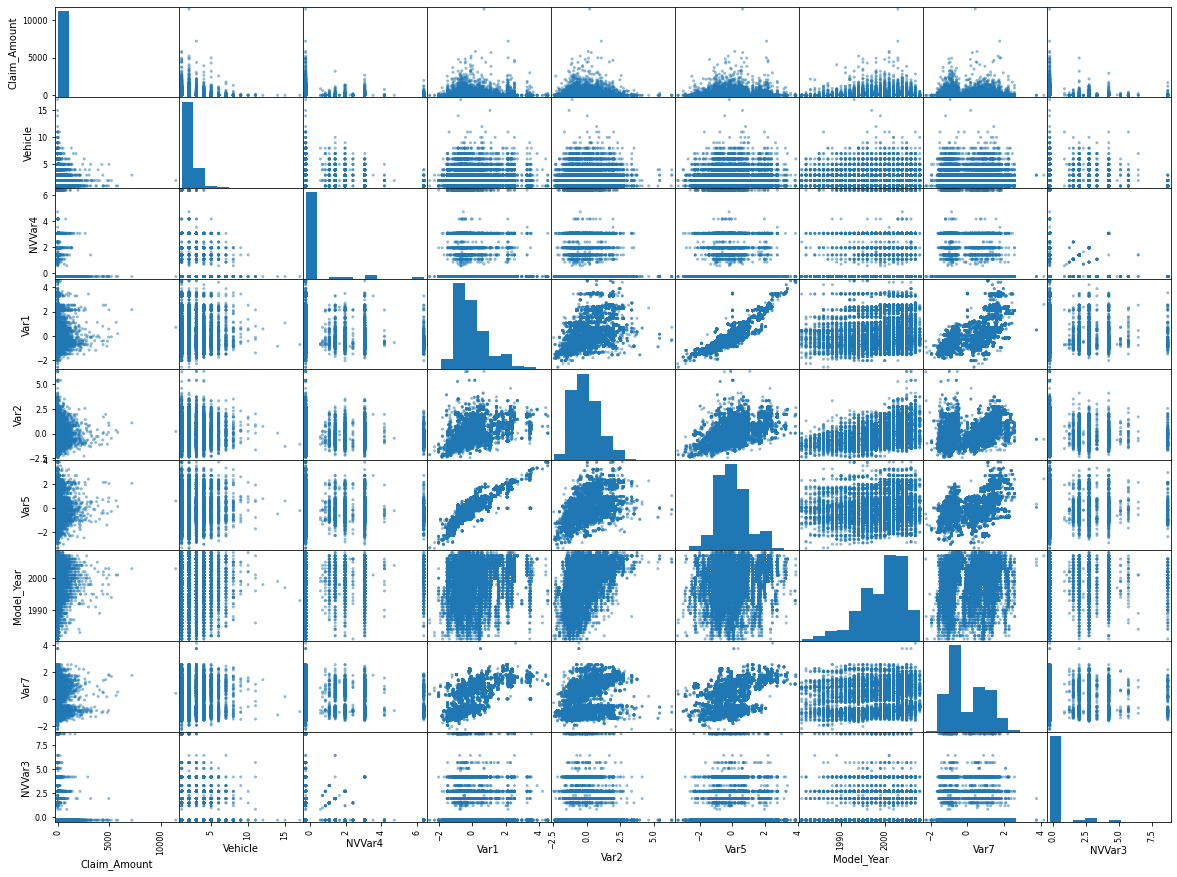

In [118]:
from pandas.plotting import scatter_matrix
attributes = ['Claim_Amount','Vehicle', 'NVVar4', 'Var1', 'Var2', 'Var5', 'Model_Year','Var7', 'NVVar3']
figscat = scatter_matrix(insurance_data[attributes], figsize=(20, 15))

C:\Users\saish\Anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 1.0, 'Original_NVVAr4')

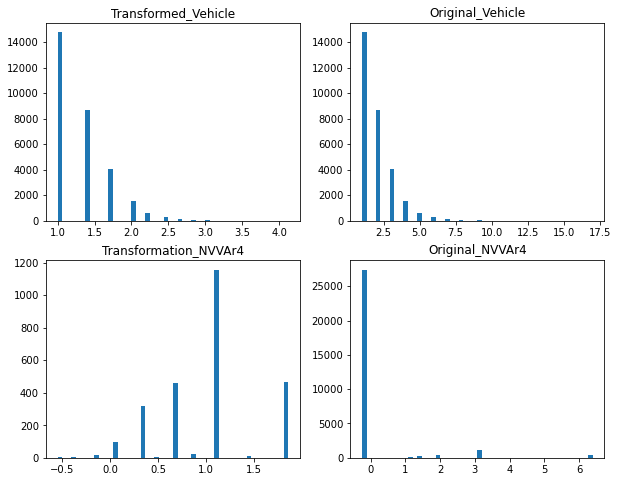

In [119]:
plt.figure(figsize=(10,8)) ## the size of the plot

plt.subplot(221) ## upper left
## plot the Original histograms for Rented Bike Count
plt.hist(np.sqrt(insurance_data['Vehicle']),bins=50)
# Annotate plot
plt.title("Transformed_Vehicle")

plt.subplot(222) ## upper right
## plot the transform histograms for Rented Bike Count
plt.hist(insurance_data['Vehicle'],bins=50)
# Annotate plot
plt.title("Original_Vehicle")

plt.subplot(223) ## upper left
## plot the Original histograms for Rented Bike Count
plt.hist(np.log(insurance_data['NVVar4']),bins=50)
# Annotate plot
plt.title("Transformation_NVVAr4")

plt.subplot(224) ## upper right
## plot the transform histograms for Rented Bike Count
plt.hist((insurance_data['NVVar4']),bins=50)
# Annotate plot
plt.title("Original_NVVAr4")

1.  a. The dataset has several fields with missing data. Choose a method to deal with missing data and justify your choice.
        We first ran a check for columns which had NA or NaN values, Cat12 was the only column with NA values(52) and since    the number of rows was very small we could drop those rows. There are many other columns with '?' or missing values to those we have first replaced the '?' with NA and then to only the significant columns we have replaced the NA values with the value which has occured most in that column

In [120]:
insurance_data.isna().sum()

Vehicle            0
Calendar_Year      0
Model_Year         0
Blind_Make         0
Blind_Model        0
Blind_Submodel     0
Cat1               0
Cat2               0
Cat3               0
Cat4               0
Cat5               0
Cat6               0
Cat7               0
Cat8               0
Cat9               0
Cat10              0
Cat11              0
Cat12             52
OrdCat             0
Var1               0
Var2               0
Var3               0
Var4               0
Var5               0
Var6               0
Var7               0
Var8               0
NVCat              0
NVVar1             0
NVVar2             0
NVVar3             0
NVVar4             0
Claim_Amount       0
dtype: int64

In [121]:
insurance_data.dropna(inplace=True)

In [122]:
missing_data = (insurance_data[['Cat2']] == '?').sum()
print(missing_data)

Cat2    10571
dtype: int64


In [123]:
insurance_data[['Blind_Make','Blind_Model','Blind_Submodel',
                'Cat1','Cat2','Cat3','Cat4','Cat5','Cat6',
                'Cat7','Cat8','Cat9','Cat10','Cat11','Cat12','OrdCat']] = insurance_data[['Blind_Make','Blind_Model', 'Blind_Submodel',
                'Cat1','Cat2','Cat3','Cat4','Cat5','Cat6',
                'Cat7','Cat8','Cat9','Cat10','Cat11','Cat12','OrdCat']].replace('?', nan)
# count the number of NaN values in each column
print(insurance_data.isna().sum())

Vehicle               0
Calendar_Year         0
Model_Year            0
Blind_Make           15
Blind_Model          15
Blind_Submodel       15
Cat1                 50
Cat2              10571
Cat3                 11
Cat4              12963
Cat5              12976
Cat6                 50
Cat7              16454
Cat8                  2
Cat9                  0
Cat10                10
Cat11                 6
Cat12                 0
OrdCat               19
Var1                  0
Var2                  0
Var3                  0
Var4                  0
Var5                  0
Var6                  0
Var7                  0
Var8                  0
NVCat                 0
NVVar1                0
NVVar2                0
NVVar3                0
NVVar4                0
Claim_Amount          0
dtype: int64


In [124]:
insurance_data["OrdCat"].value_counts()
insurance_data= insurance_data.fillna({"OrdCat": '4'})


In [125]:
insurance_data["Blind_Submodel"].value_counts()
insurance_data= insurance_data.fillna({"Blind_Submodel": "K.7.3"})



In [126]:
insurance_data["Blind_Model"].value_counts()
insurance_data = insurance_data.fillna({"Blind_Model": "K.7"})


In [127]:
insurance_data["Blind_Make"].value_counts()
insurance_data = insurance_data.fillna({"Blind_Make": "K"})


In [128]:
print(insurance_data.isna().sum())

Vehicle               0
Calendar_Year         0
Model_Year            0
Blind_Make            0
Blind_Model           0
Blind_Submodel        0
Cat1                 50
Cat2              10571
Cat3                 11
Cat4              12963
Cat5              12976
Cat6                 50
Cat7              16454
Cat8                  2
Cat9                  0
Cat10                10
Cat11                 6
Cat12                 0
OrdCat                0
Var1                  0
Var2                  0
Var3                  0
Var4                  0
Var5                  0
Var6                  0
Var7                  0
Var8                  0
NVCat                 0
NVVar1                0
NVVar2                0
NVVar3                0
NVVar4                0
Claim_Amount          0
dtype: int64


 1.  b. Convert categorical values to a suitable representation. Notice that there are many categorical variables in the dataset. If you use all the categorical variables you will end up with a large feature space. Feel free to ignore categorical variables that will increase your feature space considerably but use at least five categorical variables.

Variables with fairly low correlation will be dropped as they dont contribute much to the prediction and also as there are too many categorical variables without labels to derive any sort of intuition or inference. For the rest of the categorical variables we have applied OneHotEncoder principle

In [129]:
insurance_data = insurance_data.drop(['Cat1','Cat2','Cat3','Cat4','Cat5',
                                      'Cat6','Cat7','Cat8','Cat10','Cat11'], axis=1)

For the skewness and dirstribution issues as seen from the plots above we have applied the below transformations

In [130]:
insurance_data['NVVar4']  = np.log(insurance_data['NVVar4'])
insurance_data['NVVar3']  = np.log(insurance_data['NVVar3'])
insurance_data['NVVar2']  = np.log(insurance_data['NVVar2'])
insurance_data['Vehicle'] = np.sqrt(insurance_data['Vehicle'])
insurance_data = insurance_data.fillna({"NVVar2": insurance_data['NVVar2'].mean() })
insurance_data = insurance_data.fillna({"NVVar3": insurance_data['NVVar3'].mean() })
insurance_data = insurance_data.fillna({"NVVar4": insurance_data['NVVar4'].mean() })

C:\Users\saish\Anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


The below column has been derived for two purposes, firstly to deal with the imbalanced dataset and secondly for the developing the classifier model.

In [131]:
insurance_data['Claims_Amount_Derived'] = insurance_data.apply(lambda row: 0 if (row.Claim_Amount == 0) else 1, axis = 1)

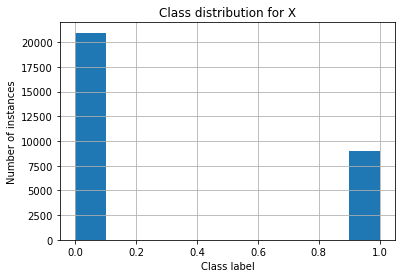

In [132]:
insurance_data['Claims_Amount_Derived'].hist()
plt.ylabel('Number of instances')
plt.xlabel('Class label')
plt.title('Class distribution for X')
plt.show()

1. c. The data is highly imbalanced: more records contain zero claims than not.  When designing your predictive model, you need to account for this

As seen from the plot above the predictor variable is imbalanced this will result in a model that will favor the majority class and will have inaccurate predictions for the minority class. To deal with this we have used oversampling method using RandomOverSampler, this will ensure the data has equal number of cases to work with and that there will be no bias

Before we begin to transform the data or treat it for missing values, the data should be split into Training and Test set. One reason is that it'll give you a Test set with impurities which could be leveraged to design a preprocess treatment your unseen Test set.

In [133]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest = train_test_split(insurance_data, test_size=0.15, random_state=42)


In [134]:
Xtrain_att = Xtrain.drop(['Claims_Amount_Derived','Claim_Amount'], axis=1)
Xtrain_labels = Xtrain['Claims_Amount_Derived']

Xtest_att = Xtest.drop(['Claims_Amount_Derived','Claim_Amount'], axis=1)
Xtest_labels = Xtest['Claim_Amount']


In [135]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

attributes_cat = ['Vehicle', 'Calendar_Year','Model_Year', 'Blind_Make',  'Blind_Model', 'Blind_Submodel',\
                  'Cat9','Cat12','OrdCat','NVCat']

attributes_num = ['Var1', 'Var2', 'Var3', 'Var4', 'Var5', 'Var6',\
                  'Var7', 'Var8','NVVar1','NVVar2','NVVar3','NVVar4']   

#full_transform = ColumnTransformer([
#    ("num", StandardScaler(), attributes_num),
#    ("cat", OneHotEncoder(handle_unknown='ignore'), attributes_cat),
#])




In [136]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

   
numeric_transformer = Pipeline(steps=[
   ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
   ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
   transformers=[                                                                              
       ('num', numeric_transformer, attributes_num),
       ('cat', categorical_transformer, attributes_cat)])


In [137]:
Xtrain_lr_att = Xtrain.drop(['Claim_Amount','Claims_Amount_Derived'], axis=1)
Xtrain_lr_labels = Xtrain['Claim_Amount']

Xtest_lr_att = Xtest.drop(['Claim_Amount','Claims_Amount_Derived'], axis=1)
Xtest_lr_labels = Xtest['Claim_Amount']


In [138]:
Xtrain2_unsampled, Xval = train_test_split(Xtrain, test_size=0.15, random_state=42)

#**
#Xtrain2_att_unsampled = Xtrain2_unsampled.drop(['Claims_Amount_Derived'], axis=1)
Xtrain2_att_unsampled = Xtrain2_unsampled
Xtrain2_labels_unsampled = Xtrain2_unsampled['Claims_Amount_Derived']


from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy='minority')
Xtrain2_att_sampled, Xtrain2_labels_sampled = oversample.fit_resample(Xtrain2_att_unsampled, Xtrain2_labels_unsampled)
#**

Xtrain2_lr_att = Xtrain2_att_sampled.drop(['Claim_Amount','Claims_Amount_Derived'], axis=1)
Xtrain2_lr_labels = Xtrain2_att_sampled['Claim_Amount']

Xval_lr_att = Xval.drop(['Claim_Amount','Claims_Amount_Derived'], axis=1)
Xval_lr_labels = Xval['Claim_Amount']

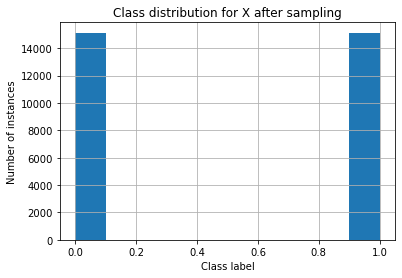

In [139]:
Xtrain2_labels_sampled.hist()
plt.ylabel('Number of instances')
plt.xlabel('Class label')
plt.title('Class distribution for X after sampling')
plt.show()

Now due to sampling the data is very much balanced and can be used to model the data

In [140]:
#Xtrain2_lr_att_prepared = full_transform.fit_transform(Xtrain2_lr_att)
#Xval_lr_att_prepared = full_transform.transform(Xval_lr_att)
#Xtest_lr_att_prepared = full_transform.transform(Xtest_lr_att)

In [141]:
#whole_train_set_attributes_lr = np.vstack((Xtrain2_lr_att_prepared.A, Xval_lr_att_prepared.A))
#whole_train_set_labels_lr = np.hstack((Xtrain2_lr_labels, Xval_lr_labels))

In [142]:
from sklearn.model_selection import PredefinedSplit
test_fold = np.zeros((np.shape(Xtrain)[0], 1))
test_fold[0:np.shape(Xtrain2_unsampled)[0]] = -1
ps = PredefinedSplit(test_fold)

In [143]:
from sklearn.model_selection import GridSearchCV

#Commented after getting the parameters*****
#fit_intercept_lr = ['True', 'False']
#normalize_lr = ['True', 'False']
#param_grid_lr = dict(fit_intercept = fit_intercept_lr, normalize = normalize_lr)
#grid_regression_lr = GridSearchCV(LinearRegression(), param_grid=param_grid_lr, n_jobs=-1, cv=ps, scoring='neg_mean_squared_error')
#grid_regression_lr.fit(whole_train_set_attributes_lr, whole_train_set_labels_lr)
#*****


For the following Regression models, we'll be using the Pipeline workflow mechanism which will first transform the numerical and categorical variables and then apply the individual regressions. Root Mean Square Errors would be used to evaulate the performance of these regression models

2. a. Performance using Linear regression : 236.05737952763832

In [145]:
from sklearn.metrics import mean_squared_error

#regr_lr = LinearRegression(fit_intercept=grid_regression_lr.best_params_["fit_intercept"],normalize=grid_regression_lr.best_params_["normalize"])
regr_lr = LinearRegression(fit_intercept='True',normalize='True')


model_pipeline_lr = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regression', LinearRegression(fit_intercept='true', normalize= 'true' ,n_jobs= -1))
])

model_pipeline_lr.fit(Xtrain2_lr_att, Xtrain2_lr_labels)
Xval_lr_predictions = model_pipeline_lr.predict(Xval_lr_att)

#regr_lr.fit(Xtrain2_lr_att_prepared, Xtrain2_lr_labels)
#Xval_lr_predictions = regr_lr.predict(Xval_lr_att_prepared)

## Computing the RMSE for the validation dataset
error_val_lr = np.sqrt(mean_squared_error(Xval_lr_labels, Xval_lr_predictions))
print('The RMSE on the validation data for Linear Regression is :',error_val_lr)

#Xtest_lr_predictions = regr_lr.predict(Xtest_lr_att_prepared)
#error_test_lr = np.sqrt(mean_squared_error(Xtest_lr_labels, Xtest_lr_predictions))
#print('The RMSE on the test data for Linear Regression is :',error_test_lr)


The RMSE on the validation data for Linear Regression is : 236.05737952763832


2. b. Performance using Ridge regression : 220.96039269273135

In [146]:
from sklearn.linear_model import Ridge

#Commented after getting the parameters*****
#alpha_ridge = [1.0,2.0,3.0,5.0]
#normalize_ridge = ['True', 'False']
#fit_intercept_ridge = ['True', 'False']
#param_grid_ridge = dict(alpha = alpha_ridge, normalize = normalize_ridge, fit_intercept = fit_intercept_ridge)

#grid_regression_ridge = GridSearchCV(Ridge(), param_grid=param_grid_ridge, cv=ps, scoring='neg_mean_squared_error')
#grid_regression_ridge.fit(whole_train_set_attributes_lr, whole_train_set_labels_lr)
#*****

In [147]:
#regr_ridge = Ridge(alpha=grid_regression_ridge.best_params_["alpha"],normalize=grid_regression_ridge.best_params_["normalize"])
#regr_ridge = Ridge(alpha=1.0,normalize='True',fit_intercept='True')

model_pipeline_ridge = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regression', Ridge(alpha=1.0,normalize='True',fit_intercept='True'))
])

model_pipeline_ridge.fit(Xtrain2_lr_att, Xtrain2_lr_labels)
Xval_ridge_predictions = model_pipeline_ridge.predict(Xval_lr_att)

#regr_ridge.fit(Xtrain2_lr_att_prepared, Xtrain2_lr_labels)
#Xval_ridge_predictions = regr_ridge.predict(Xval_lr_att_prepared)

## Computing the RMSE for the validation dataset
error_val_ridge = np.sqrt(mean_squared_error(Xval_lr_labels, Xval_ridge_predictions))
print('The RMSE on the validation data for Ridge Regression is :',error_val_ridge)


#Xtest_ridge_predictions = regr_ridge.predict(Xtest_lr_att_prepared)
#error_test_ridge = np.sqrt(mean_squared_error(Xtest_lr_labels, Xtest_ridge_predictions))
#print('The RMSE on the test data for Ridge Regression is :',error_test_ridge)

The RMSE on the validation data for Ridge Regression is : 223.60121432099734


2. c. Performance using Random Forest regression : 224.40315523216634

In [148]:
from sklearn import tree
from sklearn.model_selection import PredefinedSplit

#full_transform_rf = ColumnTransformer([
#    ("num", StandardScaler(), attributes_num),
#    ("cat", OneHotEncoder(handle_unknown='ignore'), attributes_cat),
#])

In [149]:
#Xtrain2_rf_att_prepared = full_transform_rf.fit_transform(Xtrain2_lr_att)
#Xval_rf_att_prepared = full_transform_rf.transform(Xval_lr_att)

#Xtest_rf_att_prepared = full_transform_rf.transform(Xtest_lr_att)

In [150]:
#whole_train_set_attributes_rf = np.vstack((Xtrain2_rf_att_prepared.A, Xval_rf_att_prepared.A))
#whole_train_set_labels_rf = np.hstack((Xtrain2_lr_labels, Xval_lr_labels))

In [151]:
from sklearn.ensemble import RandomForestRegressor 
#n_estimators_rf = [20, 50, 100, 200]
#max_samples_rf = [500, 1000]
#max_depth_rf = [10,20]
#param_grid_rf = dict(n_estimators = n_estimators_rf, max_samples = max_samples_rf,max_depth=max_depth_rf)
#grid_regression_rf = GridSearchCV(RandomForestRegressor(), param_grid=param_grid_rf, cv=ps, scoring='neg_mean_squared_error')
#grid_regression_rf.fit(whole_train_set_attributes_rf, whole_train_set_labels_rf)


#regr_rf = RandomForestRegressor(n_estimators=grid_regression_rf.best_params_["n_estimators"],max_samples=grid_regression_rf.best_params_["max_samples"])
#regr_rf = RandomForestRegressor(n_estimators=100 ,max_samples=1000,max_depth=10 )

model_pipeline_rf = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regression', RandomForestRegressor(n_estimators=100 ,max_samples=1000,max_depth=10 ))
])

model_pipeline_rf.fit(Xtrain2_lr_att, Xtrain2_lr_labels)
Xval_rf_predictions = model_pipeline_rf.predict(Xval_lr_att)



#regr_rf.fit(Xtrain2_rf_att_prepared, Xtrain2_lr_labels)
#Xval_rf_predictions = regr_rf.predict(Xval_rf_att_prepared)

## Computing the RMSE for the validation dataset
error_val_rf = np.sqrt(mean_squared_error(Xval_lr_labels, Xval_rf_predictions))
print('The RMSE on the validation data for Random Forest Regression is :',error_val_rf)

#Xtest_rf_predictions = regr_rf.predict(Xtest_rf_att_prepared)
#error_test_rf = np.sqrt(mean_squared_error(Xtest_lr_labels, Xtest_rf_predictions))
#print('The RMSE on the test data for Random Forest Regression is :',error_test_rf)

The RMSE on the validation data for Random Forest Regression is : 223.28150539888838


2. d. Performance using Gradient Boosting regression : 218.07992216403318

In [152]:
#Gradient_transform = ColumnTransformer([
#    ("cat", OneHotEncoder(handle_unknown='ignore'), attributes_cat),
#],remainder='passthrough')

In [153]:
## fit transform in the train set
#Xtrain2_gb_att_prepared = Gradient_transform.fit_transform(Xtrain2_lr_att)
## transform in the validation set
#Xval_gb_att_prepared = Gradient_transform.transform(Xval_lr_att)

#Xtest_gb_att_prepared = Gradient_transform.transform(Xtest_lr_att)

In [154]:
#whole_train_set_attributes_gb = np.vstack((Xtrain2_gb_att_prepared.A , Xval_gb_att_prepared.A))
#whole_train_set_labels_gb = np.hstack((Xtrain2_lr_labels, Xval_lr_labels))

In [155]:
from sklearn.ensemble import GradientBoostingRegressor
#n_estimators_gb = [20, 50, 100, 200]
#criterion_gb = {‘friedman_mse’, ‘mse’, ‘mae’}
#max_depth_gb= [5,10]
#param_grid_gb = dict(n_estimators = n_estimators_gb)
#grid_regression_gb = GridSearchCV(GradientBoostingRegressor(), param_grid=param_grid_gb, cv=ps, scoring='neg_mean_squared_error')
#grid_regression_gb.fit(whole_train_set_attributes_gb, whole_train_set_labels_gb)


#regr_gb = GradientBoostingRegressor(n_estimators=grid_regression_gb.best_params_["n_estimators"])
#regr_gb = GradientBoostingRegressor(n_estimators=20)

model_pipeline_gb = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regression', RandomForestRegressor(n_estimators=20, criterion = 'mse',max_depth = 5 ))
])

model_pipeline_gb.fit(Xtrain2_lr_att, Xtrain2_lr_labels)
Xval_gb_predictions = model_pipeline_gb.predict(Xval_lr_att)


#regr_gb.fit(Xtrain2_gb_att_prepared, Xtrain2_lr_labels)
#Xval_gb_predictions = regr_gb.predict(Xval_gb_att_prepared)

## Computing the RMSE for the validation dataset
error_val_gb = np.sqrt(mean_squared_error(Xval_lr_labels, Xval_gb_predictions))
print('The RMSE on the validation data for Gradient Boosting Regression is :',error_val_gb)

#Xtest_gb_predictions = regr_gb.predict(Xtest_gb_att_prepared)

#error_test_gb = np.sqrt(mean_squared_error(Xtest_lr_labels, Xtest_gb_predictions))
#print('The RMSE on the test data for Gradient Boostong Regression is :',error_test_gb)

The RMSE on the validation data for Gradient Boosting Regression is : 218.06262752988076


3. a. Performance using a combination of two models  

    Random Forrest

In [156]:
Xtrain_rfc = Xtrain
Xtest_rfc = Xtest

Xtrain_rfc_att = Xtrain_rfc.drop(['Claim_Amount','Claims_Amount_Derived'], axis=1)
Xtrain_rfc_labels = Xtrain_rfc['Claims_Amount_Derived']

Xtest_rfc_att = Xtest_rfc.drop(['Claim_Amount','Claims_Amount_Derived'], axis=1)
Xtest_rfc_labels = Xtest_rfc['Claims_Amount_Derived']

In [157]:
#Xtrain2_rfc = Xtrain2
Xval_rfc = Xval

Xtrain2_rfc_att = Xtrain2_att_sampled.drop(['Claim_Amount','Claims_Amount_Derived'], axis=1)
Xtrain2_rfc_labels = Xtrain2_labels_sampled

Xval_rfc_att = Xval_rfc.drop(['Claim_Amount','Claims_Amount_Derived'], axis=1)
Xval_rfc_labels = Xval_rfc['Claims_Amount_Derived']

In [158]:
## fit transform in the train set
#Xtrain2_rfc_att_prepared = full_transform.fit_transform(Xtrain2_rfc_att)
## transform in the validation set
#Xval_rfc_att_prepared = full_transform.transform(Xval_rfc_att)

#Xtest_rfc_att_prepared = full_transform.transform(Xtest_rfc_att)

In [159]:
#whole_train_set_attributes_rfc = np.vstack((Xtrain2_rfc_att_prepared.A , Xval_rfc_att_prepared.A))
#whole_train_set_labels_rfc = np.hstack((Xtrain2_rfc_labels, Xval_rfc_labels))

In [160]:
from sklearn.ensemble import RandomForestClassifier
#n_estimators_rfc = [100, 200,300, 500]
#criterion_rfc = np.array(['entropy', 'gini'])
#max_depth_rfc = [3, 5, 10, 15, 20]
#param_grid_rfc = dict(n_estimators = n_estimators_rfc, criterion = criterion_rfc,max_depth = max_depth_rfc)
#grid_class_rfc = GridSearchCV(RandomForestClassifier(), param_grid=param_grid_rfc, cv=ps, scoring='neg_mean_squared_error')
#grid_class_rfc.fit(whole_train_set_attributes_rfc, whole_train_set_labels_rfc)


#class_rfc = RandomForestClassifier(n_estimators=grid_class_rfc.best_params_["n_estimators"],
#                                  criterion=grid_class_rfc.best_params_["criterion"],
#                                  max_depth=grid_class_rfc.best_params_["max_depth"])

#class_rfc = RandomForestClassifier(n_estimators=100,
#                                  criterion='entropy',
#                                  max_depth=5)

model_pipeline_rfc = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(n_estimators=100,
                                  criterion='entropy',
                                  max_depth=5)
)
])

model_pipeline_rfc.fit(Xtrain2_rfc_att, Xtrain2_rfc_labels)
Xval_rfc_predictions = model_pipeline_rfc.predict(Xval_rfc_att)


#class_rfc.fit(Xtrain2_rfc_att_prepared, Xtrain2_rfc_labels)
#Xval_rfc_predictions = class_rfc.predict(Xval_rfc_att_prepared)

from sklearn.metrics import accuracy_score # Accuracy score
accuracy_val_rfc = accuracy_score(Xval_rfc_labels, Xval_rfc_predictions)
print('Accuracy on the validation data for Gradient Boosting Classification is:',accuracy_val_rfc) 

#Xtest_rfc_predictions = class_rfc.predict(Xtest_rfc_att_prepared)
#accuracy_test_rfc = accuracy_score(Xtest_rfc_labels, Xtest_rfc_predictions)
#print('Accuracy on the test data for Random Forrest Classification is:',accuracy_test_rfc) 

from sklearn.metrics import classification_report
print('The performance on the validation set for Random Forest Classification is:')
print(classification_report(Xval_rfc_labels, Xval_rfc_predictions))
#print('The performance on the test set for Random Forest Classification is:')
#print(classification_report(Xtest_rfc_labels, Xtest_rfc_predictions))

## recall performance measure
from sklearn.metrics import recall_score
print('The recall on the validation set for Random Forest Classification is:')
print(recall_score(Xval_rfc_labels, Xval_rfc_predictions))
#print('The recall on the test set for Random Forest Classification is:')
#print(recall_score(Xtest_rfc_labels, Xtest_rfc_predictions))

Accuracy on the validation data for Gradient Boosting Classification is: 0.5831369468447237
The performance on the validation set for Random Forest Classification is:
              precision    recall  f1-score   support

           0       0.75      0.61      0.67      2700
           1       0.35      0.52      0.42      1119

    accuracy                           0.58      3819
   macro avg       0.55      0.56      0.55      3819
weighted avg       0.64      0.58      0.60      3819

The recall on the validation set for Random Forest Classification is:
0.517426273458445


Classification: Gradient Boosting

In [161]:
## fit transform in the train set
#Xtrain2_gbc_att_prepared = Gradient_transform.fit_transform(Xtrain2_rfc_att)
## transform in the validation set
#Xval_gbc_att_prepared = Gradient_transform.transform(Xval_rfc_att)

#Xtest_gbc_att_prepared = Gradient_transform.transform(Xtest_rfc_att)

In [162]:
#whole_train_set_attributes_gbc = np.vstack((Xtrain2_gbc_att_prepared.A , Xval_gbc_att_prepared.A))
#whole_train_set_labels_gbc = np.hstack((Xtrain2_rfc_labels, Xval_rfc_labels))

In [163]:
from sklearn.ensemble import GradientBoostingClassifier
#learning_rate_gbc = [0.1 0.5, 1]
#max_depth_gbc = [10]
#n_estimators_rfc = [100,200]

#param_grid_gbc = dict(learning_rate = learning_rate_gbc,max_depth = max_depth_gbc,n_estimators=n_estimators_rfc)
#grid_class_gbc = GridSearchCV(GradientBoostingClassifier(), param_grid=param_grid_gbc,
                              #n_features=20, 
                              #n_informative=15, n_redundant=5, random_state=7
                              #cv=ps, 
                              #scoring='neg_mean_squared_error'
#                             )
#grid_class_gbc.fit(whole_train_set_attributes_gbc, whole_train_set_labels_gbc)

#class_gbc = GradientBoostingClassifier(n_estimators=grid_class_gbc.best_params_["n_estimators"],
#                                  learning_rate=,
#                                  max_depth=grid_class_gbc.best_params_["max_depth"])

#class_gbc = GradientBoostingClassifier(n_estimators=100,
#                                  learning_rate=0.1,
#                                  max_depth=10)


model_pipeline_gbc = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', GradientBoostingClassifier(n_estimators=100,
                                  criterion='mse',
                                  max_depth=10)
)
])

model_pipeline_gbc.fit(Xtrain2_rfc_att, Xtrain2_rfc_labels)
Xval_gbc_predictions = model_pipeline_gbc.predict(Xval_rfc_att)




#class_gbc.fit(Xtrain2_gbc_att_prepared, Xtrain2_rfc_labels)
#Xval_gbc_predictions = class_gbc.predict(Xval_gbc_att_prepared)

from sklearn.metrics import accuracy_score # Accuracy score
accuracy_val_gbc = accuracy_score(Xval_rfc_labels, Xval_gbc_predictions)
print('Accuracy on the validation data for Gradient Boosting Classification is:',accuracy_val_gbc) 

#Xtest_gbc_predictions = class_rfc.predict(Xtest_rfc_att_prepared)
#accuracy_test_gbc = accuracy_score(Xtest_rfc_labels, Xtest_gbc_predictions)
#print('Accuracy on the test data for Gradient Boosting Classification is:',accuracy_test_gbc) 

print('The performance on the validation set for Gradient Boosting Classification is:')
print(classification_report(Xval_rfc_labels, Xval_gbc_predictions))
#print('The performance on the test set for Gradient Boosting Classification is:')
#print(classification_report(Xtest_rfc_labels, Xtest_gbc_predictions))

## recall performance measure
from sklearn.metrics import recall_score
print('The recall on the validation set for Gradient Boosting Classification is:')
print(recall_score(Xval_rfc_labels, Xval_gbc_predictions,labels=np.unique(Xval_gbc_predictions)))
#print('The recall on the test set for Gradient Boosting Classification is:')
#print(recall_score(Xtest_rfc_labels, Xtest_gbc_predictions,labels=np.unique(Xval_gbc_predictions)))


Accuracy on the validation data for Gradient Boosting Classification is: 0.5878502225713538
The performance on the validation set for Gradient Boosting Classification is:
              precision    recall  f1-score   support

           0       0.75      0.63      0.68      2700
           1       0.35      0.49      0.41      1119

    accuracy                           0.59      3819
   macro avg       0.55      0.56      0.55      3819
weighted avg       0.63      0.59      0.60      3819

The recall on the validation set for Gradient Boosting Classification is:
0.48525469168900803


3. b. c. From the predictions obtained from the two classifiers we'll now pass them into each of the regression models from above and then compare the results to get the best one.

In [164]:
horizontal_stack_rfc = np.concatenate((Xval, Xval_rfc_predictions[:,None]), axis=1)
Xval_new_rfc = pd.DataFrame(data = horizontal_stack_rfc)

horizontal_stack_gbc = np.concatenate((Xval, Xval_gbc_predictions[:,None]), axis=1)
Xval_new_gbc = pd.DataFrame(data = horizontal_stack_gbc)


In [165]:
Xval_new_rfc.columns = ['Vehicle', 'Calendar_Year', 'Model_Year', 'Blind_Make', 'Blind_Model', 'Blind_Submodel',
                     'Cat9', 'Cat12', 'OrdCat', 'Var1', 'Var2', 'Var3', 'Var4', 'Var5', 'Var6', 'Var7',
                     'Var8', 'NVCat', 'NVVar1', 'NVVar2', 'NVVar3', 'NVVar4', 'Claim_Amount', 'Claims_Amount_Derived',
                    'Claims_Predicted']

Xval_new_gbc.columns = ['Vehicle', 'Calendar_Year', 'Model_Year', 'Blind_Make', 'Blind_Model', 'Blind_Submodel',
                     'Cat9', 'Cat12', 'OrdCat', 'Var1', 'Var2', 'Var3', 'Var4', 'Var5', 'Var6', 'Var7',
                     'Var8', 'NVCat', 'NVVar1', 'NVVar2', 'NVVar3', 'NVVar4', 'Claim_Amount', 'Claims_Amount_Derived',
                    'Claims_Predicted']


In [166]:
Xval_new_validate_rfc = Xval_new_rfc[Xval_new_rfc['Claims_Predicted']==1]
Xval_new_validate_gbc = Xval_new_gbc[Xval_new_gbc['Claims_Predicted']==1]

In [167]:
Xval_new_att_rfc = Xval_new_validate_rfc.drop(['Claim_Amount', 'Claims_Amount_Derived', 'Claims_Predicted'] , axis = 1)
Xval_new_labels_rfc = Xval_new_validate_rfc['Claim_Amount']

#Xval_new_att_prepared_rfc = full_transform.transform(Xval_new_att_rfc)

print('Tandem Model with Random Forest Classification followed by Regression Models \n') 

## Linear
Xval_ln_predictions_new = model_pipeline_lr.predict(Xval_new_att_rfc)
error_new_val_ln = np.sqrt(mean_squared_error(Xval_new_labels_rfc, Xval_ln_predictions_new))
print('The RMSE on the new validation data through RFC for Linear Regression is :',error_new_val_ln)

## Ridge
Xval_ridge_predictions_new = model_pipeline_ridge.predict(Xval_new_att_rfc)
error_new_val_ridge = np.sqrt(mean_squared_error(Xval_new_labels_rfc, Xval_ridge_predictions_new))
print('The RMSE on the new validation data through RFC for Ridge Regression is :',error_new_val_ridge)

#Random Forest
Xval_rf_predictions_new = model_pipeline_rf.predict(Xval_new_att_rfc)
error_new_val_rf = np.sqrt(mean_squared_error(Xval_new_labels_rfc, Xval_rf_predictions_new))
print('The RMSE on the new validation data through RFC for Random Forest Regression is :',error_new_val_rf)

#Gradient Boosting
Xval_gb_predictions_new = model_pipeline_gb.predict(Xval_new_att_rfc)
error_new_val_gb = np.sqrt(mean_squared_error(Xval_new_labels_rfc, Xval_gb_predictions_new))
print('The RMSE on the new validation data through RFC for Gradient Boosting Regression is :',error_new_val_gb)



Tandem Model with Random Forest Classification followed by Regression Models 

The RMSE on the new validation data through RFC for Linear Regression is : 204.16087638332007
The RMSE on the new validation data through RFC for Ridge Regression is : 193.1600366894649
The RMSE on the new validation data through RFC for Random Forest Regression is : 191.6495424772666
The RMSE on the new validation data through RFC for Gradient Boosting Regression is : 191.0284923919963


In [168]:
Xval_new_att_gbc = Xval_new_validate_gbc.drop(['Claim_Amount', 'Claims_Amount_Derived', 'Claims_Predicted'] , axis = 1)
Xval_new_labels_gbc = Xval_new_validate_gbc['Claim_Amount']

#Xval_new_att_prepared_gbc = full_transform.transform(Xval_new_att_gbc)

print('Tandem Model with Gradient Boosting Classification followed by Regression Models \n') 

## Linear
Xval_ln_predictions_new = model_pipeline_lr.predict(Xval_new_att_gbc)
error_new_val_ln = np.sqrt(mean_squared_error(Xval_new_labels_gbc, Xval_ln_predictions_new))
print('The RMSE on the new validation data through GBC for Linear Regression is :',error_new_val_ln)

## Ridge
Xval_ridge_predictions_new = model_pipeline_ridge.predict(Xval_new_att_gbc)
error_new_val_ridge = np.sqrt(mean_squared_error(Xval_new_labels_gbc, Xval_ridge_predictions_new))
print('The RMSE on the new validation data through GBC for Ridge Regression is :',error_new_val_ridge)

#Random Forest
Xval_rf_predictions_new = model_pipeline_rf.predict(Xval_new_att_gbc)
error_new_val_rf = np.sqrt(mean_squared_error(Xval_new_labels_gbc, Xval_rf_predictions_new))
print('The RMSE on the new validation data through GBC for Random Forest Regression is :',error_new_val_rf)

#Gradient Boosting
Xval_gb_predictions_new = model_pipeline_gb.predict(Xval_new_att_gbc)
error_new_val_gb = np.sqrt(mean_squared_error(Xval_new_labels_gbc, Xval_gb_predictions_new))
print('The RMSE on the new validation data through GBC for Gradient Boosting Regression is :',error_new_val_gb)



Tandem Model with Gradient Boosting Classification followed by Regression Models 

The RMSE on the new validation data through GBC for Linear Regression is : 229.61631339037766
The RMSE on the new validation data through GBC for Ridge Regression is : 216.66470695387176
The RMSE on the new validation data through GBC for Random Forest Regression is : 213.8625483544041
The RMSE on the new validation data through GBC for Gradient Boosting Regression is : 211.022903192401


We could thus confirm that a tandem model works better than a single regression model. The RMSE values for each of the regressors have improved suggesting that tandem is a better fit.

4. Evaluating performance on Test data


Since the RMSE value for Gradient Boosting Regression was the least of all we now pass the test data to it to check its performance.

In [169]:
#Step 2 -> Gradient Boosting Regression
Xtest_gb_predictions = model_pipeline_gb.predict(Xtest_lr_att)
error_test_gb = np.sqrt(mean_squared_error(Xtest_lr_labels, Xtest_gb_predictions))
print('The RMSE on the test data for Gradient Boosting Regression is :',error_test_gb)


The RMSE on the test data for Gradient Boosting Regression is : 233.9855082926602


Since the recall obtained from Random Forest Classification was higher we have chosen it to evaluate the performance on the test data

In [170]:
#Step 3-> Random Forest classification followed by Gradient Boosting Regression
Xtest_rfc_predictions = model_pipeline_rfc.predict(Xtest_rfc_att)
accuracy_test_rfc = accuracy_score(Xtest_rfc_labels, Xtest_rfc_predictions)
print('Accuracy on the test data for Gradient Boosting Classification is:',accuracy_test_rfc) 
print('The performance on the test set for Gradient Boosting Classification is:')
print(classification_report(Xtest_rfc_labels, Xtest_rfc_predictions))
print('The recall on the test set for Gradient Boosting Classification is:')
print(recall_score(Xtest_rfc_labels, Xtest_rfc_predictions,labels=np.unique(Xval_rfc_predictions)))


Accuracy on the test data for Gradient Boosting Classification is: 0.5835744491431115
The performance on the test set for Gradient Boosting Classification is:
              precision    recall  f1-score   support

           0       0.75      0.60      0.67      3125
           1       0.37      0.54      0.44      1368

    accuracy                           0.58      4493
   macro avg       0.56      0.57      0.56      4493
weighted avg       0.64      0.58      0.60      4493

The recall on the test set for Gradient Boosting Classification is:
0.5431286549707602


In [171]:
horizontal_stack_rfc_test = np.concatenate((Xtest, Xtest_rfc_predictions[:,None]), axis=1)
Xtest_new_rfc = pd.DataFrame(data = horizontal_stack_rfc_test)
Xtest_new_rfc.columns = ['Vehicle', 'Calendar_Year', 'Model_Year', 'Blind_Make', 'Blind_Model', 'Blind_Submodel',
                     'Cat9', 'Cat12', 'OrdCat', 'Var1', 'Var2', 'Var3', 'Var4', 'Var5', 'Var6', 'Var7',
                     'Var8', 'NVCat', 'NVVar1', 'NVVar2', 'NVVar3', 'NVVar4', 'Claim_Amount', 'Claims_Amount_Derived',
                    'Claims_Predicted']
Xtest_new_validate_rfc = Xtest_new_rfc[Xtest_new_rfc['Claims_Predicted']==1]
Xtest_new_att_rfc = Xtest_new_validate_rfc.drop(['Claim_Amount', 'Claims_Amount_Derived', 'Claims_Predicted'] , axis = 1)
Xtest_new_labels_rfc = Xtest_new_validate_rfc['Claim_Amount']

#Xtest_new_att_prepared_rfc = full_transform.transform(Xtest_new_att_rfc)
#Gradient Boosting
Xtest_rf_predictions_new = model_pipeline_rf.predict(Xtest_new_att_rfc)
error_new_test_rf = np.sqrt(mean_squared_error(Xtest_new_labels_rfc, Xtest_rf_predictions_new))
print('The RMSE on the new validation data through Random Forest Classification followed by Random Forest Regression is :',error_new_test_rf)



The RMSE on the new validation data through Random Forest Classification followed by Random Forest Regression is : 226.37768915718692


6. Create a function 

    The below function will take the test data as an input run preprocessing on it and followed by transformation on it. The best tandem model is then used to give the predictions for the test set

In [172]:
def my_insurance_claim_predictor(Xtest):
    Xtest = Xtest.iloc[:,2:35]
    for col in ['Vehicle', 'Calendar_Year', 'Model_Year']:
        Xtest[col] = Xtest[col].astype('float64')
    Xtest[['Blind_Make','Blind_Model','Blind_Submodel',
                    'Cat1','Cat2','Cat3','Cat4','Cat5','Cat6',
                    'Cat7','Cat8','Cat9','Cat10','Cat11','Cat12','OrdCat']] = Xtest[['Blind_Make','Blind_Model', 'Blind_Submodel',
                    'Cat1','Cat2','Cat3','Cat4','Cat5','Cat6',
                    'Cat7','Cat8','Cat9','Cat10','Cat11','Cat12','OrdCat']].replace('?', nan)
    Xtest = Xtest.replace(nan, '')
    Xtest_prep = Xtest.drop(['Cat1','Cat2','Cat3','Cat4','Cat5',
                                               'Cat6','Cat7','Cat8','Cat10','Cat11'], axis=1)

    Xtest_prep['NVVar4']  = np.log(Xtest_prep['NVVar4'])
    Xtest_prep['NVVar3']  = np.log(Xtest_prep['NVVar3'])
    Xtest_prep['NVVar2']  = np.log(Xtest_prep['NVVar2'])
    Xtest_prep['Vehicle'] = np.sqrt(Xtest_prep['Vehicle'])
    Xtest_prep = Xtest_prep.fillna({"NVVar2": Xtest_prep['NVVar2'].mean() })
    Xtest_prep = Xtest_prep.fillna({"NVVar3": Xtest_prep['NVVar3'].mean() })
    Xtest_prep = Xtest_prep.fillna({"NVVar4": Xtest_prep['NVVar4'].mean() })
    #insurance_data_prep['Claims_Amount_Derived'] = insurance_data_prep.apply(lambda row: 0 if (row.Claim_Amount == 0) else 1, axis = 1)

    #Xtest_lr_att = Xtest.drop(['Claim_Amount','Claims_Amount_Derived'], axis=1)
    Xtest_prep['OrdCat'] = Xtest_prep['OrdCat'].apply(str)
    Xtest_final_att = Xtest_prep 
    Xtest_final_att = Xtest_final_att.drop('Unnamed: 34', axis =1)
    #Xtest_lr_labels = Xtest['Claim_Amount']

    
    #Xtest_final_prepared = Gradient_transform.transform(Xtest_final_att)
    
    Xtest_final_predictions = model_pipeline_rfc.predict(Xtest_final_att)

    horizontal_stack_test = np.concatenate((Xtest_final_att, Xtest_final_predictions[:,None]), axis=1)
    Xtest_final = pd.DataFrame(data = horizontal_stack_test)
    Xtest_final.columns = ['Vehicle', 'Calendar_Year', 'Model_Year', 'Blind_Make', 'Blind_Model', 'Blind_Submodel',
                           'Cat9', 'Cat12', 'OrdCat', 'Var1', 'Var2', 'Var3', 'Var4', 'Var5', 'Var6', 'Var7',
                           'Var8', 'NVCat', 'NVVar1', 'NVVar2', 'NVVar3', 'NVVar4','Claims_Predicted']
    Xtest_validate = Xtest_final[Xtest_final['Claims_Predicted']==1]

    Xtest_new_att_rfc = Xtest_validate.drop(['Claims_Predicted'] , axis = 1)

    #Xtest_new_att_prepared_gbc = full_transform.transform(Xtest_new_att_gbc)
    #Gradient Boosting
    Xtest_rf_predictions_new2 = model_pipeline_rf.predict(Xtest_new_att_rfc)
    
    horizontal_stack_test_predicted = np.concatenate((Xtest_validate, Xtest_rf_predictions_new2[:,None]), axis=1)
    Xtest_final_predicted = pd.DataFrame(data = horizontal_stack_test_predicted)

    
    Xtest_final_predicted.columns = ['Vehicle', 'Calendar_Year', 'Model_Year', 'Blind_Make', 'Blind_Model', 'Blind_Submodel',
                           'Cat9', 'Cat12', 'OrdCat', 'Var1', 'Var2', 'Var3', 'Var4', 'Var5', 'Var6', 'Var7',
                           'Var8', 'NVCat', 'NVVar1', 'NVVar2', 'NVVar3', 'NVVar4','Claims_Predicted', 'Claim_Amount']
    
    result_predicted = pd.merge(Xtest_final, Xtest_final_predicted, how='left', on=['Vehicle', 'Calendar_Year', 'Model_Year', 'Blind_Make', 'Blind_Model', 'Blind_Submodel',
                           'Cat9', 'Cat12', 'OrdCat', 'Var1', 'Var2', 'Var3', 'Var4', 'Var5', 'Var6', 'Var7',
                           'Var8', 'NVCat', 'NVVar1', 'NVVar2', 'NVVar3', 'NVVar4','Claims_Predicted'])
    
    result_predicted['Claim_Amount'] = result_predicted['Claim_Amount'].replace(nan, 0)
    predictions = result_predicted['Claim_Amount']
    
    return predictions


In [173]:
Xtest = pd.read_csv('./data/test.csv')
predictions = my_insurance_claim_predictor(Xtest)
print(predictions)

0     71.730837
1      0.000000
2     68.637933
3     86.960066
4     78.891392
5    189.043887
6     68.877244
7     85.526603
8     71.544982
Name: Claim_Amount, dtype: float64


C:\Users\saish\Anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


5.	Present your solution
 - Missing Data Labels
     
     Since the names of most of the category variables were masked, dropping those to reduce the feature space would always be a gamble as there is no strong reasoning behind it other than the variable distribution and the correlation. Prior domain information can provide stong intuition factor when it comes to feature selection and thus would always lead into a better model. 
     
 - Imbalanced Data
     
     Since most of the machine learning models rely on equal distribution of data classes it is important to sample the data. This data set is an actual refecltion of real life scenario wherein the actual pay outs for claims are significantly lower it is more important to identify the minority class correctly. 
     
 - Parameter Tuning
     
     Although time cosuming both cross-validation and tuning of parameters gives back the best fit for the model.
     
 - Data Processing
     
     This can go a long way in building great models and thus is necessary to always explore the data first and gain insights from it. Processing can be done using pipleline mechanism which is a automated workflow and can be reused a number of times.
     
 - The variable 'Vehicle' has a strong correlation with the predictor variable while 'Model_Year' has a negative correlation which is true in real life too and older model car would always have lower claim settlement.
 
 - Also, it can be seen that with each passing year'Calendar_Year' the number of claims settled have risen.